# Ali Abdullah Ahmad
# CWID- 20031246
## Section 3.3 part 1

Predicting subgroup a company will likely belong to without the feature "Bankrupt?"

Importing libraries and preprocessed data (Data which was cleaned, scaled and outliers dealt with) from Section 3.2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib


In [2]:
df = pd.read_csv('C:/Users/abdul/OneDrive/Documents/GitHub/CS559_project/Preprocessed_DF.csv')
df.head()

,Unnamed: 0,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Cluster,Bankrupt?,Index
0,0,0.450397,0.504034,0.506986,0.594640,0.594640,0.998906,0.797293,0.809239,0.303489,...,0.594641,0.838869,0.279036,0.026788,0.565144,1,0.032464,2,0,0
1,1,0.530005,0.572885,0.574763,0.605695,0.605558,0.999058,0.797512,0.809399,0.303553,...,0.605690,0.841869,0.279040,0.026801,0.565205,1,0.032442,0,0,1
2,2,0.571150,0.620148,0.624177,0.612275,0.612282,0.999163,0.797654,0.809533,0.303582,...,0.612271,0.843294,0.278927,0.026816,0.565276,1,0.033034,0,0,2
3,3,0.483401,0.556694,0.536164,0.602445,0.602445,0.999035,0.797458,0.809380,0.303506,...,0.602444,0.841891,0.293391,0.027063,0.566190,1,0.015406,4,0,3
4,4,0.510359,0.537287,0.552546,0.600023,0.600023,0.999009,0.797406,0.809313,0.303468,...,0.600019,0.840313,0.279878,0.026880,0.565549,1,0.028858,5,0,4


In [3]:
# Display information about the DataFrame `df_train`
# This includes the number of entries, columns, non-null values, data types, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5314 entries, 0 to 5313
Data columns (total 99 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Unnamed: 0                                                5314 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  5314 non-null   float64
 2    ROA(A) before interest and % after tax                   5314 non-null   float64
 3    ROA(B) before interest and depreciation after tax        5314 non-null   float64
 4    Operating Gross Margin                                   5314 non-null   float64
 5    Realized Sales Gross Margin                              5314 non-null   float64
 6    Operating Profit Rate                                    5314 non-null   float64
 7    Pre-tax net Interest Rate                                5314 non-null   float64
 8    After-tax net Int

In [4]:
# Extract the 'Index' column from the DataFrame `df` and assign it to the variable `index`
target = df['Bankrupt?']
index = df['Index']
cluster = df['Cluster']
df = df.drop(columns=['Bankrupt?','Index','Cluster','Unnamed: 0'])
df.shape

(5314, 95)

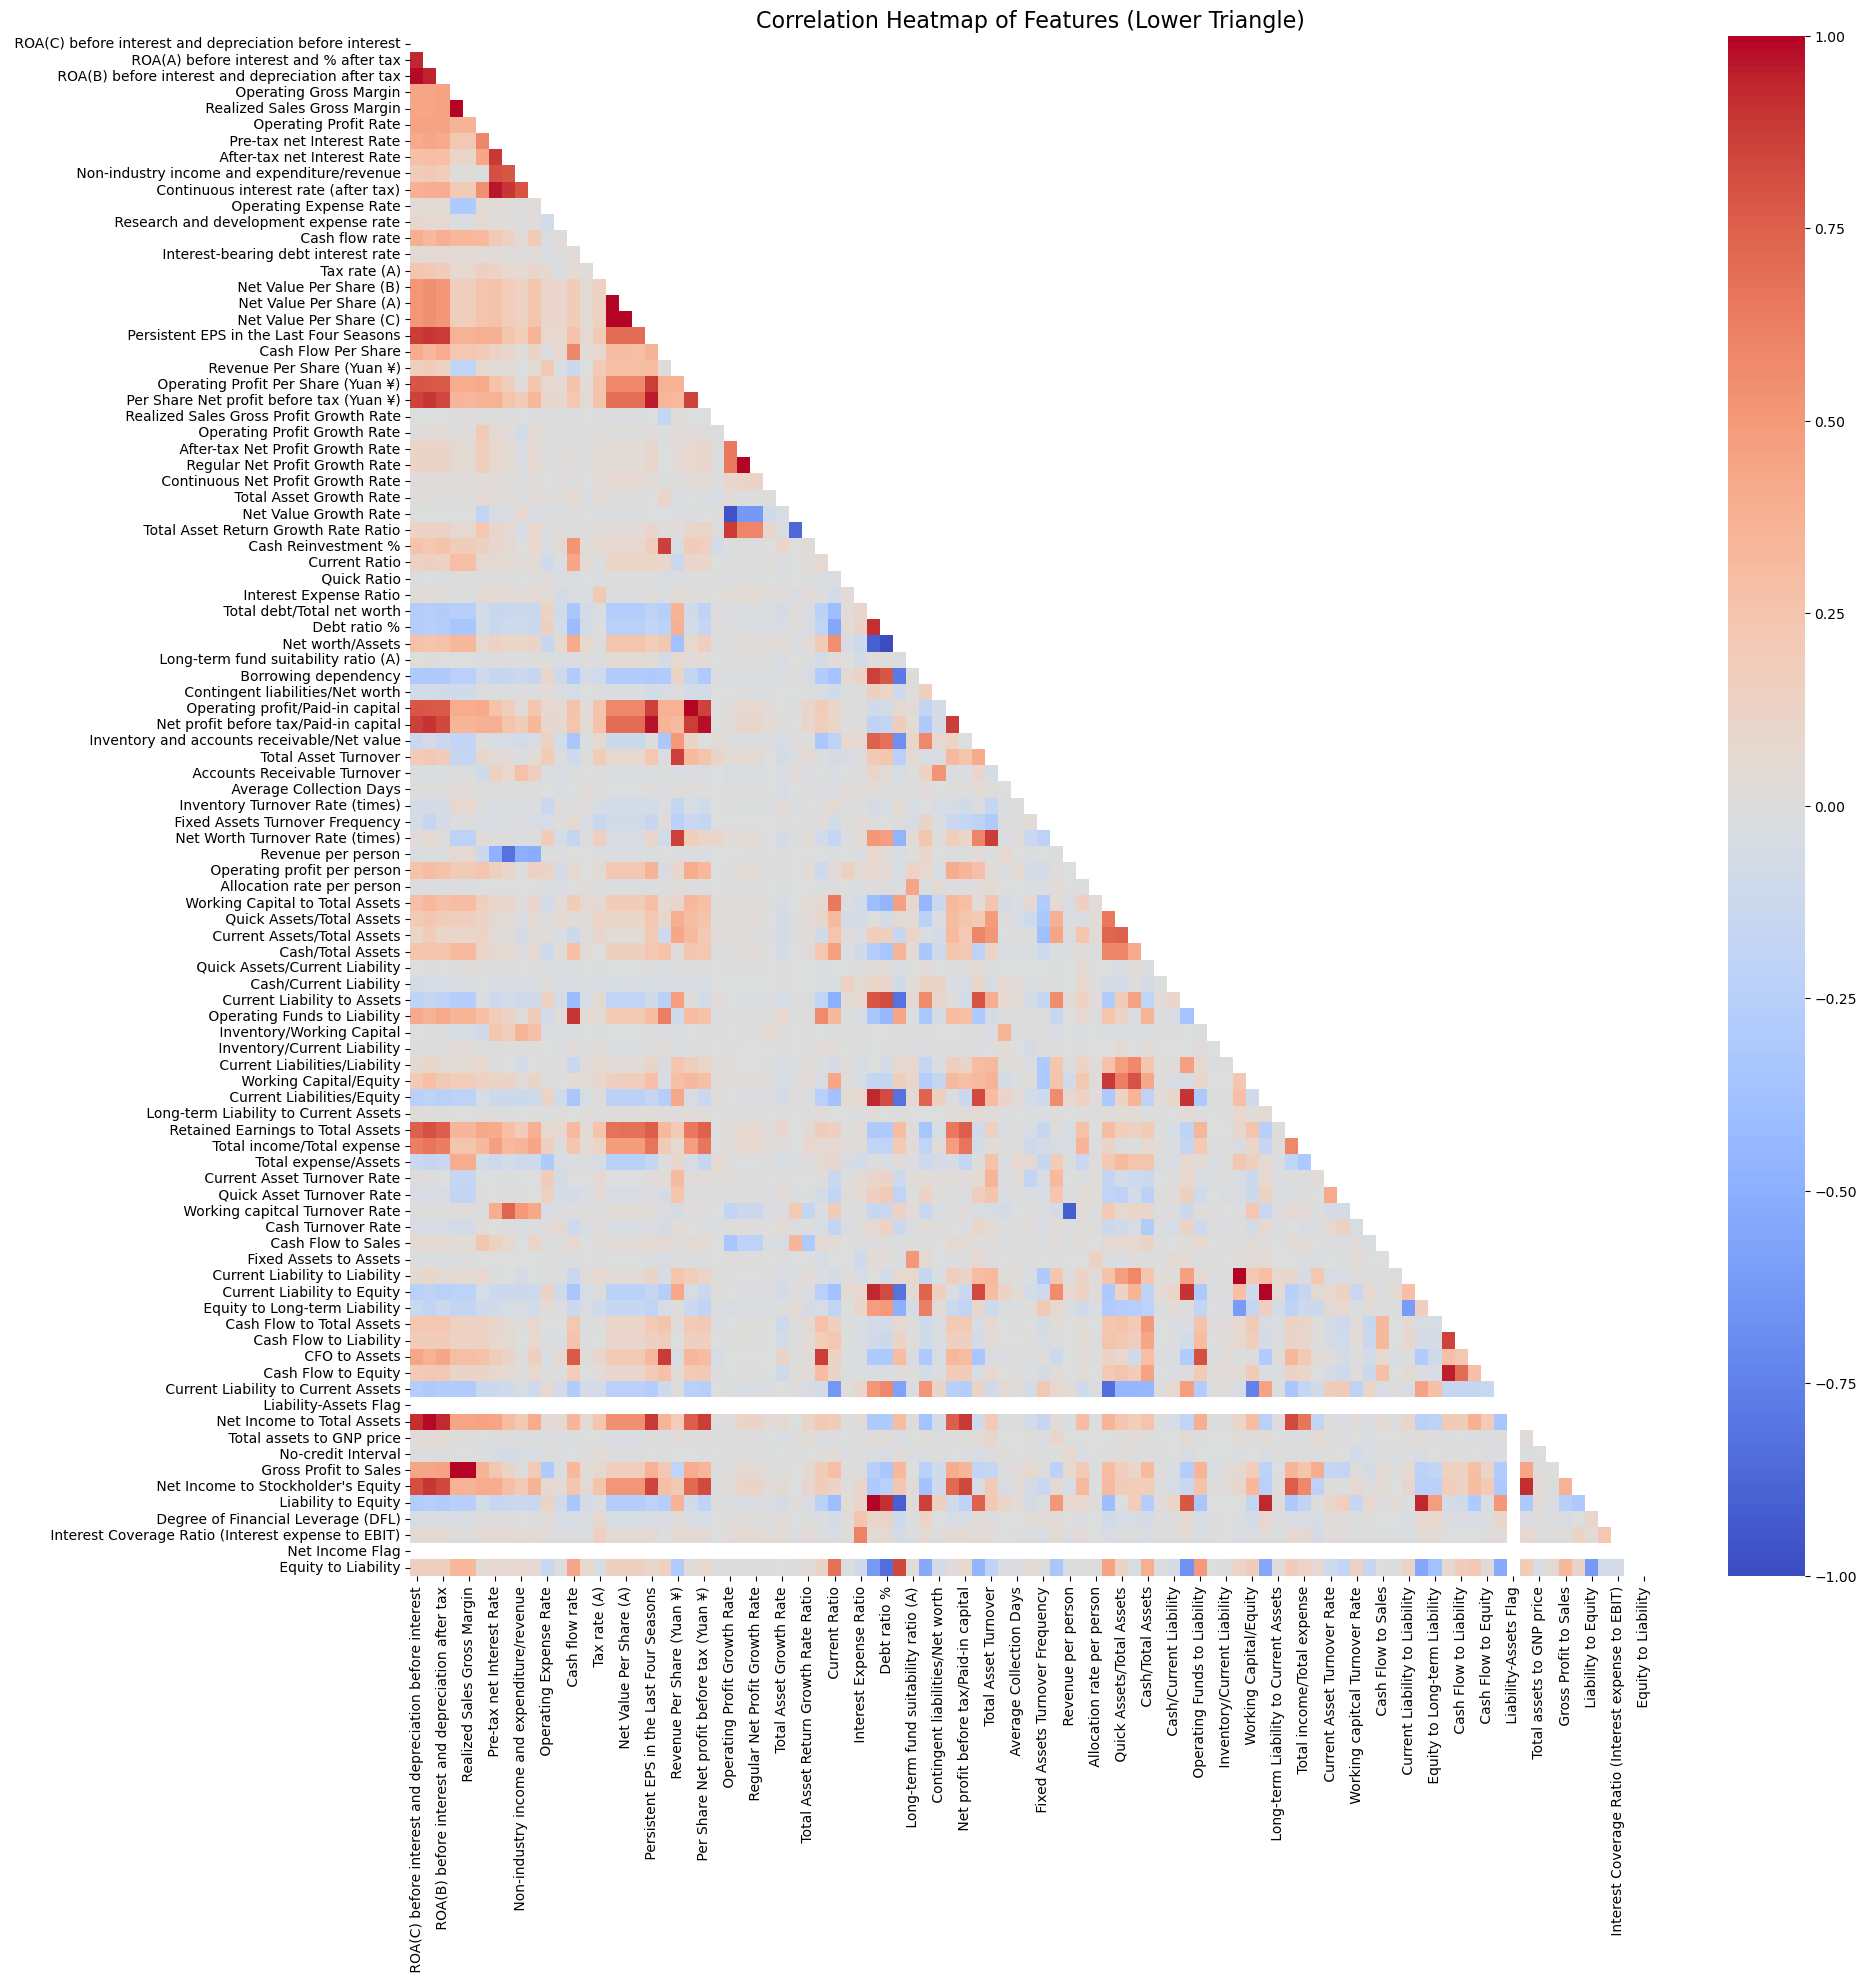

In [5]:
# Compute the correlation matrix
corr = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Features (Lower Triangle)", fontsize=16)
plt.show()

In [6]:
# Identify features with high correlation
# Initialize an empty set to store the names of highly correlated features
high_corr_features = set()

# Iterate through the correlation matrix to find pairs of features with correlation > 0.95
for i in range(len(corr.columns)):
    for j in range(i):
        # If the absolute correlation value is greater than 0.95, add the feature name to the set
        if abs(corr.iloc[i, j]) > 0.95:
            colname = corr.columns[i]
            high_corr_features.add(colname)

# Drop the highly correlated features from the DataFrame
df_reduced = df.drop(columns=high_corr_features)

# Display the shape of the reduced DataFrame to verify the number of remaining features
df_reduced.shape

(5314, 79)

C:\Users\abdul\AppData\Local\Temp\ipykernel_23256\3394837456.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MI SCORE", y="Feature", data=mi_df, palette="viridis")  # Create a horizontal bar plot


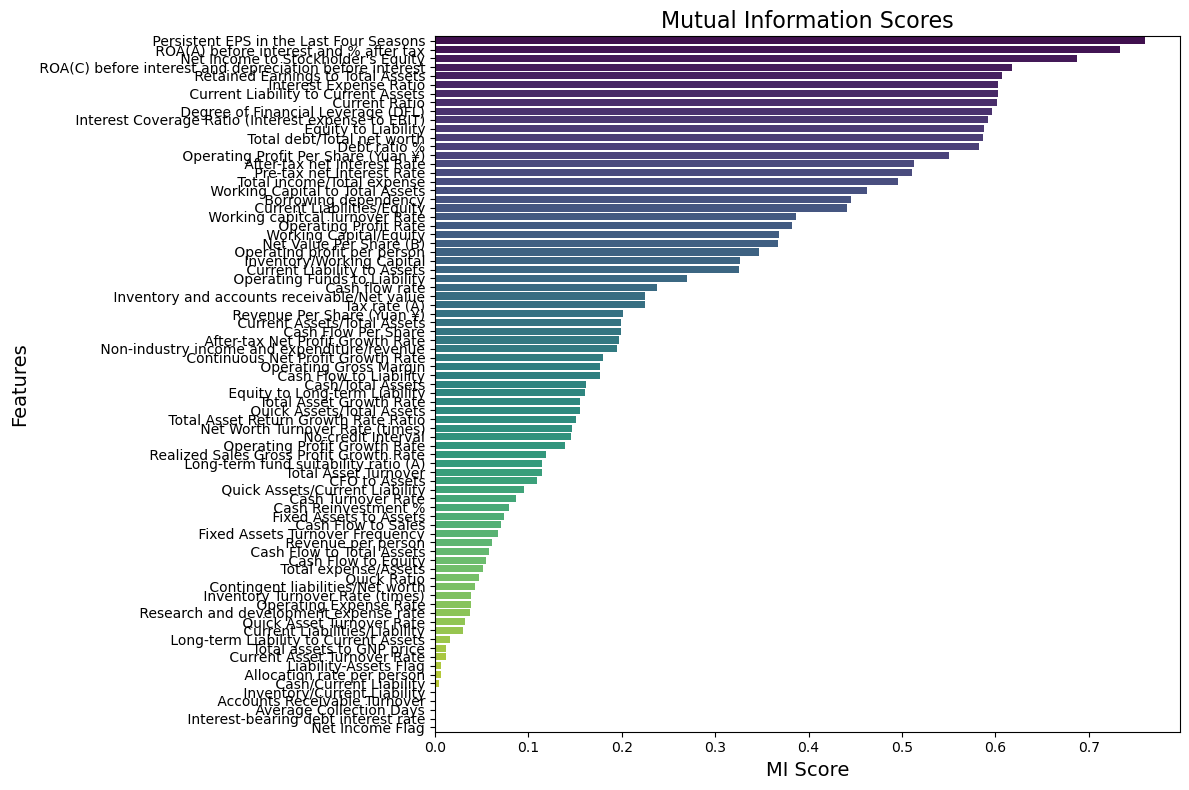

In [7]:
# Calculate mutual information scores between features and the target variable
mi_score = mutual_info_classif(df_reduced, cluster, random_state=42)

# Create a DataFrame to store features and their corresponding MI scores
mi_df = pd.DataFrame({
    "Feature": df_reduced.columns,  # Feature names
    "MI SCORE": mi_score                # Corresponding MI scores
}).sort_values(by="MI SCORE", ascending=False)  # Sort by MI scores in descending order

# Improved plotting of mutual information scores
plt.figure(figsize=(12, 8))  # Set the figure size
sns.barplot(x="MI SCORE", y="Feature", data=mi_df, palette="viridis")  # Create a horizontal bar plot
plt.title("Mutual Information Scores", fontsize=16)  # Set the plot title
plt.xlabel("MI Score", fontsize=14)  # Label for the x-axis
plt.ylabel("Features", fontsize=14)  # Label for the y-axis
plt.tight_layout()  # Adjust layout for better fit
plt.show()  # Display the plot

In [8]:
# Display the full mutual information scores DataFrame
pd.set_option('display.max_rows', None)  # Set to display all rows
print(mi_df.sort_values(by="MI SCORE", ascending=False))

# Drop rows where "MI SCORE" is less than 0.02
mi_02 = mi_df[mi_df["MI SCORE"] >= 0.2]

                                              Feature  MI SCORE
13            Persistent EPS in the Last Four Seasons  0.759761
1              ROA(A) before interest and % after tax  0.733569
74                 Net Income to Stockholder's Equity  0.687876
0    ROA(C) before interest and depreciation befor...  0.618325
56                  Retained Earnings to Total Assets  0.607240
26                             Interest Expense Ratio  0.602909
70                Current Liability to Current Assets  0.602752
24                                      Current Ratio  0.601430
75                 Degree of Financial Leverage (DFL)  0.596793
76   Interest Coverage Ratio (Interest expense to ...  0.592370
78                                Equity to Liability  0.587786
27                         Total debt/Total net worth  0.586678
28                                       Debt ratio %  0.582737
16                Operating Profit Per Share (Yuan ¥)  0.550902
5                         After-tax net 

In [9]:
df_02 = df_reduced.drop(columns=[col for col in df_reduced.columns if col not in mi_02["Feature"].values])
df_02.shape

(5314, 32)

In [10]:
df_02.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Cash flow rate,Tax rate (A),Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Revenue Per Share (Yuan ¥),...,Working Capital/Equity,Current Liabilities/Equity,Retained Earnings to Total Assets,Total income/Total expense,Working capitcal Turnover Rate,Current Liability to Current Assets,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
count,5314.000000,5314.000000,5314.000000,5314.000000,5314.000000,5314.000000,5314.000000,5314.000000,5314.000000,5314.000000,...,5314.000000,5314.000000,5314.000000,5314.000000,5314.000000,5314.000000,5314.000000,5314.000000,5314.000000,5314.000000
mean,0.506533,0.560825,0.999011,0.797449,0.809354,0.467309,0.119972,0.188970,0.227416,0.038182,...,0.735981,0.331078,0.936669,0.002389,0.593976,0.030136,0.840924,0.027070,0.565437,0.043125
std,0.049314,0.050428,0.000291,0.000591,0.000796,0.011295,0.140464,0.023211,0.022032,0.037367,...,0.003745,0.004551,0.013831,0.000320,0.000316,0.016795,0.002521,0.001880,0.002364,0.028620
min,0.331595,0.363116,0.991252,0.776710,0.761550,0.380613,0.000000,0.138806,0.133497,0.000106,...,0.705754,0.326206,0.869288,0.001163,0.572892,0.000770,0.814061,0.000000,0.532957,0.012523
25%,0.478623,0.538269,0.998974,0.797393,0.809317,0.461674,0.000000,0.174413,0.215468,0.016388,...,0.733637,0.328160,0.931866,0.002245,0.593935,0.018632,0.840210,0.026791,0.565158,0.024575
50%,0.504022,0.560647,0.999023,0.797466,0.809377,0.465090,0.085940,0.184632,0.224922,0.027512,...,0.735971,0.329741,0.937896,0.002339,0.593962,0.027871,0.841212,0.026815,0.565278,0.033423
75%,0.534295,0.587808,0.999091,0.797572,0.809464,0.470809,0.210092,0.198896,0.238040,0.045934,...,0.738465,0.332300,0.944452,0.002486,0.593998,0.038116,0.842314,0.026926,0.565760,0.051268
max,0.684883,0.752998,0.999706,0.812848,0.822551,0.606720,1.000000,0.291939,0.328638,0.400759,...,0.770523,0.369839,0.977481,0.009277,0.598467,0.123408,0.847191,0.060652,0.596730,0.194160


In [11]:
X_train_02, X_val_02, y_train_02, y_val_02 = train_test_split(df_02, target, test_size=0.2, random_state=42)

In [12]:
clf_02 = RandomForestClassifier(random_state=42)
clf_02.fit(X_train_02, y_train_02)

RandomForestClassifier(random_state=42)

In [13]:
# Step 5: Evaluate performance
y_pred_02 = clf_02.predict(X_val_02)
print("📊 Confusion Matrix:")
print(confusion_matrix(y_val_02, y_pred_02))

print("\n🧠 Classification Report:")
print(classification_report(y_val_02, y_pred_02))

📊 Confusion Matrix:
[[1032    4]
 [  22    5]]

🧠 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1036
           1       0.56      0.19      0.28        27

    accuracy                           0.98      1063
   macro avg       0.77      0.59      0.63      1063
weighted avg       0.97      0.98      0.97      1063

